## boston dataset from sklearn

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
boston_dataset = datasets.load_boston()
type(boston_dataset)

sklearn.utils.Bunch

In [3]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## get data and label(target) from boston dataset

In [5]:
boston_data = boston_dataset.data
boston_target = boston_dataset.target

### saperate train set and test set

In [6]:
train_boston_data, test_boston_data, train_boston_target, test_boston_target = train_test_split(boston_data, boston_target, test_size=0.2, random_state=0 )
type(train_boston_target[:5]), train_boston_target[:5], test_boston_target[:5], train_boston_data[:5], test_boston_data[:5]

(numpy.ndarray,
 array([26.7, 21.7, 22. , 22.9, 10.4]),
 array([22.6, 50. , 23. ,  8.3, 21.2]),
 array([[3.58090e-01, 0.00000e+00, 6.20000e+00, 1.00000e+00, 5.07000e-01,
         6.95100e+00, 8.85000e+01, 2.86170e+00, 8.00000e+00, 3.07000e+02,
         1.74000e+01, 3.91700e+02, 9.71000e+00],
        [1.58760e-01, 0.00000e+00, 1.08100e+01, 0.00000e+00, 4.13000e-01,
         5.96100e+00, 1.75000e+01, 5.28730e+00, 4.00000e+00, 3.05000e+02,
         1.92000e+01, 3.76940e+02, 9.88000e+00],
        [1.13290e-01, 3.00000e+01, 4.93000e+00, 0.00000e+00, 4.28000e-01,
         6.89700e+00, 5.43000e+01, 6.33610e+00, 6.00000e+00, 3.00000e+02,
         1.66000e+01, 3.91250e+02, 1.13800e+01],
        [8.82900e-02, 1.25000e+01, 7.87000e+00, 0.00000e+00, 5.24000e-01,
         6.01200e+00, 6.66000e+01, 5.56050e+00, 5.00000e+00, 3.11000e+02,
         1.52000e+01, 3.95600e+02, 1.24300e+01],
        [2.59406e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.79000e-01,
         5.30400e+00, 8.91000e+01, 1.64750

##LinearRegression

In [7]:
from sklearn.linear_model import  LinearRegression

#Gradient Boosting regression
https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py

In [11]:
from sklearn import ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
import numpy as np

In [12]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(train_boston_data, train_boston_target)

mse = mean_squared_error(test_boston_target, reg.predict(test_boston_data))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))          

The mean squared error (MSE) on test set: 18.9031


In [13]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(test_boston_data)):
    test_score[i] = reg.loss_(test_boston_target, y_pred)


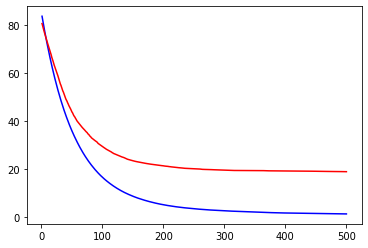

In [14]:
import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(6, 6))
# plt.subplot(1, 1, 1)
# plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
# plt.legend(loc='upper right')
# plt.xlabel('Boosting Iterations')
# plt.ylabel('Deviance')
# fig.tight_layout()
plt.show()